Summary of Predictor and Response Variables

Setup

In [1]:
# For specific histograms
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
from hot_dust import preprocess

In [3]:
from importlib import reload

# "reload" to get changes in preprocess.py without restarting the kernel
preprocess = reload(preprocess)

In [4]:
ds = preprocess.prepare_training_data()
train, validate, test = preprocess.split_training_data(ds)  


Ian messed up the `ds` object, so the following is broken! Can you rewrite, getting single features like this:

```
test["x"].sel({"features": "solar_zenith_angle"})
```

You could even build this "sel" step into `preprocess.feature_histogram`

In [5]:

# Define the bands
M14_band = ds["x"].sel(features = "bt_8500")
M15_band = ds["x"].sel(features = "bt_10800")
M16_band = ds["x"].sel(features = "bt_12000")
# Subtract the bands to get the BTD bands
BTD14_15 = M14_band - M15_band
BTD14_16 = M14_band - M16_band
BTD15_16 = M15_band - M16_band

Predictor Values

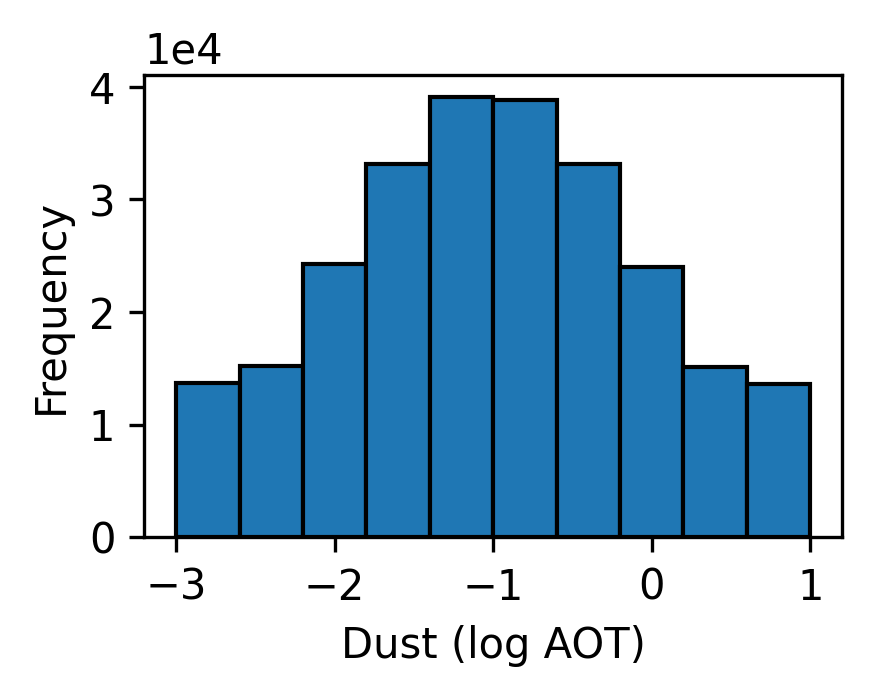

In [6]:
fig, ax = plt.subplots(figsize=(3, 2), dpi=300)

dust_opt = ds["y"].values.flatten()
plt.hist(dust_opt, edgecolor='black')  # You can adjust the color as needed
plt.xlabel("Dust (log AOT)")
plt.ylabel("Frequency")
plt.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
#plt.title('Dust Optical Thickness Histogram', fontsize=25)

plt.show()

In [7]:
print(ds["x"]['features'].values) 

['viewing_zenith_angle' 'spress' 'h2o' 'o3' 'ws' 'ts' 'bt_8500' 'bt_10800'
 'bt_12000']


In [8]:
ds = preprocess.prepare_training_data()
variable = 'spress' 
titlename= 'Surface Pressure Histogram'
preprocess.feature_histogram(ds, variable,titlename)

:NdOverlay   [Element]
   :Histogram   [x]   (x_count)

In [9]:
variable = 'viewing_zenith_angle' 
titlename= 'Viewing Zenith Angle Histogram'
preprocess.feature_histogram(ds, variable, titlename)

:NdOverlay   [Element]
   :Histogram   [x]   (x_count)

In [10]:
variable = "bt_8500"  
label = 'M14 Brightness Temp. (K)'
preprocess.feature_histogram(ds, variable, label)

:NdOverlay   [Element]
   :Histogram   [x]   (x_count)

In [11]:
variable = "bt_10800"  
titlename = 'M15 Band Histogram'
preprocess.feature_histogram(ds, variable, titlename)

:NdOverlay   [Element]
   :Histogram   [x]   (x_count)

In [12]:
variable = "bt_12000"  
titlename = 'M16 Band Histogram'
preprocess.feature_histogram(ds, variable, titlename)

:NdOverlay   [Element]
   :Histogram   [x]   (x_count)

In [13]:
variable = "ts"  
label = 'Surface Temperature (K)'
preprocess.feature_histogram(ds, variable, label)

:NdOverlay   [Element]
   :Histogram   [x]   (x_count)

In [14]:
solzen_ds = ds["x"].sel(features = "solar_zenith_angle")
cos_solzen = np.cos(np.radians(solzen_ds)) 
plt = cos_solzen.hvplot.hist()
plt

KeyError: "not all values found in index 'features'. Try setting the `method` keyword argument (example: method='nearest')."

Response Variable

Predictors v. Response

BTD Histograms

In [ ]:
plt = BTD14_15.hvplot.hist()
plt

In [ ]:
plt = BTD14_16.hvplot.hist()
plt

In [ ]:
plt = BTD15_16.hvplot.hist()
plt

Heat Maps

In [ ]:
import matplotlib.pyplot as plt
# Read the training data file
heatmap_ds = xr.open_dataset("data/rt_nn_irdust_training_data.nc") 
print(heatmap_ds)

In [ ]:
x = heatmap_ds['viewing_zenith_angle'].values
y = np.log10(heatmap_ds['dust_optical_thickness'].values) 

# Create a hexbin plot
plt.hexbin(x, y)  # Adjust gridsize and colormap as needed

# Add labels and a colorbar
plt.xlabel('Viewing Zenith Angle')
plt.ylabel('Dust Optical Thickness')
plt.title('Viewing Zenith Angle Heat Map')
plt.colorbar(label='Counts')

# Show the plot
plt.show()

In [ ]:
x = heatmap_ds['spress'].values
y = np.log10(heatmap_ds['dust_optical_thickness'].values) 

# Create a hexbin plot
plt.hexbin(x, y)  # Adjust gridsize and colormap as needed

# Add labels and a colorbar
plt.xlabel('Spress')
plt.ylabel('Dust Optical Thickness')
plt.title('Spress Heat Map')
plt.colorbar(label='Counts')

# Show the plot
plt.show()

In [ ]:
x = heatmap_ds['h2o'].values
y = np.log10(heatmap_ds['dust_optical_thickness'].values)  

# Create a hexbin plot
plt.hexbin(x, y)  # Adjust gridsize and colormap as needed

# Add labels and a colorbar
plt.xlabel('H2O')
plt.ylabel('Dust Optical Thickness')
plt.title('H2O Heat Map')
plt.colorbar(label='Counts')

# Show the plot
plt.show()

In [ ]:
x = heatmap_ds['o3'].values
y = np.log10(heatmap_ds['dust_optical_thickness'].values) 

# Create a hexbin plot
plt.hexbin(x, y)  # Adjust gridsize and colormap as needed

# Add labels and a colorbar
plt.xlabel('O3')
plt.ylabel('Dust Optical Thickness')
plt.title('O3 Heat Map')
plt.colorbar(label='Counts')

# Show the plot
plt.show()

In [ ]:
x = heatmap_ds['ws'].values
y = np.log10(heatmap_ds['dust_optical_thickness'].values)  

# Create a hexbin plot
plt.hexbin(x, y)  # Adjust gridsize and colormap as needed

# Add labels and a colorbar
plt.xlabel('WS')
plt.ylabel('Dust Optical Thickness')
plt.title('WS Heat Map')
plt.colorbar(label='Counts')

# Show the plot
plt.show()

In [ ]:
x = heatmap_ds['ts'].values
y = np.log10(heatmap_ds['dust_optical_thickness'].values) 

# Create a hexbin plot
plt.hexbin(x, y)  # Adjust gridsize and colormap as needed

# Add labels and a colorbar
plt.xlabel('TS')
plt.ylabel('Dust Optical Thickness')
plt.title('TS Heat Map')
plt.colorbar(label='Counts')

# Show the plot
plt.show()